### Regression From Scratch 
---

In [1]:
import numpy as np
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt 
from tqdm import tqdm_notebook
import copy, math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')
%matplotlib inline


In [2]:
data = pd.read_csv("bike_sharing_data.txt")


In [3]:
data.shape


(97, 2)

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
X_train = data[0:80]

In [6]:
X_test = data[80:]

### Visualize the Data
---

Text(0.5, 1.0, 'Profit in $10000 vs the Population')

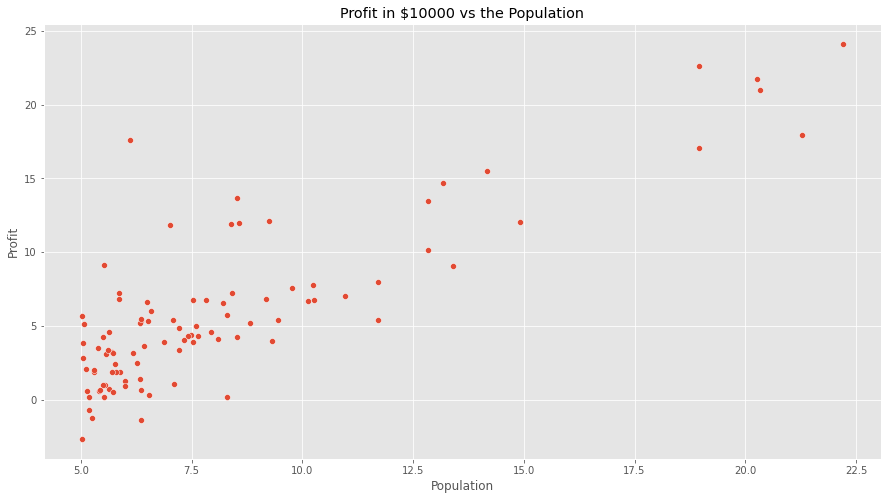

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.scatterplot(x="Population",y="Profit",data= data)
ax.set_title("Profit in $10000 vs the Population")

<h2 align="center"> Linear Regression for Single Variable</h2>

---

***Key Steps***

### Task 1: Define the model :



$h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$



### Task 2: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$


### Task 3: Gradient Descent

---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

### Task 4: Predict the data

---

In [8]:
class linear_regration_from_scratch:
    
    def __init__(self,m,epochs): 
        self.theta = np.zeros((2,1))
        self.m = m
        self.cost =[]
        self.epochs = epochs
        
        self.theta_0 = []
        self.theta_1 = []
        self.cost_values = np.zeros((epochs,epochs))
        
    def model(self,X):
        y_pred = X.dot(self.theta)
        return y_pred
    
    
    def cost_function(self,X,y):
        y_pred = self.model(X)
        error = (y_pred-y)**2
        return 1 / (2*self.m) * np.sum(error)

    def grad(self,X,y,alpha):
        y_pred = self.model(X)
        error = np.dot(X.transpose(),(y_pred -y))
        self.theta -= alpha * (1/self.m) *error
    
    def fit(self,data,alpha):
        
        X = np.append(np.ones((self.m,1)),data.Population.values.reshape(self.m,1),axis = 1) # reshaping in 2d and adding a column for X0
        y = data.Profit.values.reshape(self.m,1) #reshapaning in 2d array
      

        for i in tqdm_notebook(range(self.epochs),total=self.epochs,unit="epochs"):
                
                self.theta_0.append(self.theta[0,0])
                self.theta_1.append(self.theta[1,0])
        
    
                self.grad(X,y,alpha)
                self.cost.append(self.cost_function(X,y))
        
        plt.figure(figsize=(15,8))
        plt.plot(self.cost)
        plt.xlabel("Epochs")
        plt.ylabel("$J(\Theta)$")
        plt.title(" Value of the cost function over Gradiant Descent")
        
        
       
    
    def grad_3D_plot(self,data):
        
        X = np.append(np.ones((self.m,1)),data.Population.values.reshape(self.m,1),axis = 1) # reshaping in 2d and adding a column for X0
        y = data.Profit.values.reshape(self.m,1) #reshapaning in 2d array
        
        for i in tqdm_notebook(range(len(self.theta_0))):       
            for j in range(len(self.theta_1)):           
                t = np.array([self.theta_0[i],self.theta_1[j]])
                self.cost_values[i,j] = 1 / (2*self.m) * np.sum((X.dot(t)-y)**2)
                
        fig = plt.figure()
        ax = plt.axes(projection = "3d")
        WW,BB = np.meshgrid(np.array(self.theta_0),np.array(self.theta_1))
        ax.plot_surface(WW,BB,self.cost_values,cmap ="viridis")
        ax.set_xlabel("$\Theta_0$")
        ax.set_ylabel("$\Theta1$")
        ax.set_zlabel("$J(\Theta)$")
        #ax.view_init(30,270)
        plt.rcParams["figure.figsize"]=10,10
        plt.show()
        
    def predict(self,x):
        X = list(np.append(1,x))
        y_pred = np.dot(self.theta.transpose(),X)
        return y_pred
    
    


In [9]:
Lr = linear_regration_from_scratch(X_train["Profit"].count(),150)


/var/folders/9w/y6dgsfld2f94jqzfxb_f6q800000gn/T/ipykernel_13551/3674076567.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(self.epochs),total=self.epochs,unit="epochs"):


  0%|          | 0/150 [00:00<?, ?epochs/s]

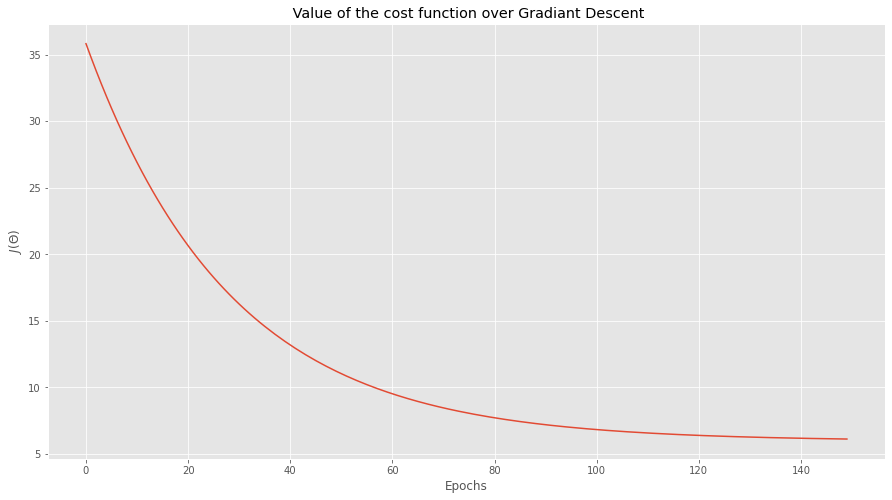

In [10]:
Lr.fit(X_train,0.0002)


### Task 5: Visualising the Cost Function $J(\theta)$
---

/var/folders/9w/y6dgsfld2f94jqzfxb_f6q800000gn/T/ipykernel_13551/3674076567.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(self.theta_0))):


  0%|          | 0/150 [00:00<?, ?it/s]

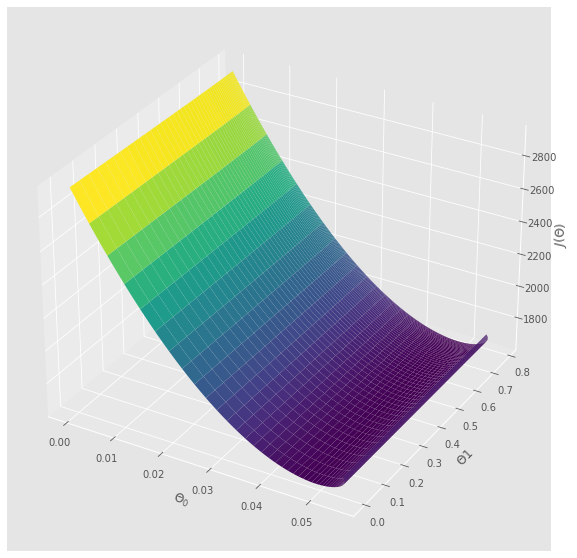

In [39]:
Lr.grad_3D_plot(X_train)

### Task 6: Linear Regression Fit Curve
---

/Users/adarsh_iitd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Linear Regression Fit')

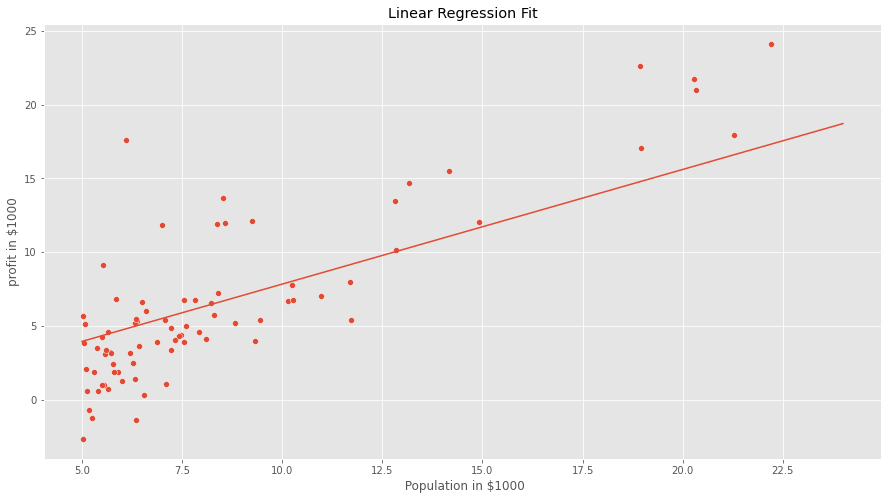

In [12]:
fig, scat = plt.subplots(figsize=(15, 8))

scat = sns.scatterplot(x = "Population",y = "Profit",data = X_train)

x_values = [x for x in range(5,25)]
y_values = [ Lr.predict(x)[0] for x in x_values]

sns.lineplot(x_values,y_values)

plt.xlabel(" Population in $1000")
plt.ylabel("profit in $1000")
plt.title("Linear Regression Fit")

### Task 7: Inference using the optimized $\theta$ values

In [13]:
y_pred = Lr.predict(7)
print(y_pred)


[5.49977094]


In [14]:
Y_pred = []
for x in X_test["Population"]:
    Y_pred.append(Lr.predict(x))

In [15]:
Y_pred

[array([4.51119907]),
 array([4.0905037]),
 array([4.99856158]),
 array([7.65357874]),
 array([5.12318324]),
 array([6.68002059]),
 array([7.19577693]),
 array([4.72341374]),
 array([4.34877083]),
 array([3.99015292]),
 array([4.49447394]),
 array([5.99499038]),
 array([4.62127376]),
 array([4.18151952]),
 array([6.50592365]),
 array([10.47374684]),
 array([4.28381509])]

In [16]:
Y = X_test["Profit"].values

In [17]:
error = np.sqrt((1/X_test.shape[0])*np.sum(np.square((Y_pred - Y))))

In [18]:
error

16.88323810597166

---

<h2 align="center"> Linear Regression for Multiple Variable</h2>


In [19]:
df = pd.read_csv("50_Startups.csv.xls")

In [20]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
df.shape

(50, 5)

In [22]:
df.drop("State",axis = 1,inplace=True)

In [23]:
df = df/10000  #Normalizing the for calculation purposes

In [24]:
X = df.drop("Profit",axis = 1)
Y = df["Profit"].values.reshape(df.shape[0], 1)

In [25]:
X.shape

(50, 3)

X = np.vstack((np.ones((X.shape[0], )), X.T)).T #adding one column for intercept theta_0

### Model Key Steps:

### Task 1: Define the model :



$h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(X) = \theta^TX = \theta_0 + \theta_1x_1 + \theta_2x_2 ...........+ \theta_mx_m$$





<a name="toc_15456_2.1"></a>
### Here Matrix X is :

$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
Notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$


### Task 2: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$


### Task 3: Gradient Descent

---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

### Task 4: Prediction

---

In [26]:
class Multivariate_Regression_From_Scratch:
    
    def __init__(self,X,Y):
        
        self.X = X
        self.Y = Y
        self.m = self.Y.size
        self.theta = np.zeros((self.X.shape[1], 1))
    
    def model(self):
        y_pred = np.dot(self.X, self.theta)
        return y_pred
      
    def cost_function(self):
        y_pred = self.model()
        cost = (1/(2*self.m))*np.sum(np.square(y_pred - self.Y))
        return cost
        
    def gradiant_decent(self,learning_rate):
        
        d_theta = (1/self.m)*np.dot(self.X.T, self.model() - self.Y)
        self.theta = self.theta - learning_rate*d_theta
    
    def fit(self,learning_rate, iteration):
        cost_list = []
        for i in range(iteration):
            cost = self.cost_function()
            cost_list.append(cost)
            
            # to print the cost for 10 times
            if(i%(iteration/10) == 0):
                print("Cost is :", cost)
            self.gradiant_decent(learning_rate)
        
        rng = np.arange(0, iteration)
        plt.plot(rng, cost_list)
        plt.show()
        
    def predict(self):
        y_pred = np.dot(self.X, self.theta)
        return y_pred
        

In [27]:
abc =Multivariate_Regression_From_Scratch(X,Y)

Cost is : 70.69463875246178
Cost is : 2.9908026438246806
Cost is : 2.350698359354681
Cost is : 1.9789194257107339
Cost is : 1.7437140268186184
Cost is : 1.5816932868256108
Cost is : 1.461761419637558
Cost is : 1.3681703381365213
Cost is : 1.2925435166033332
Cost is : 1.2301098812571503


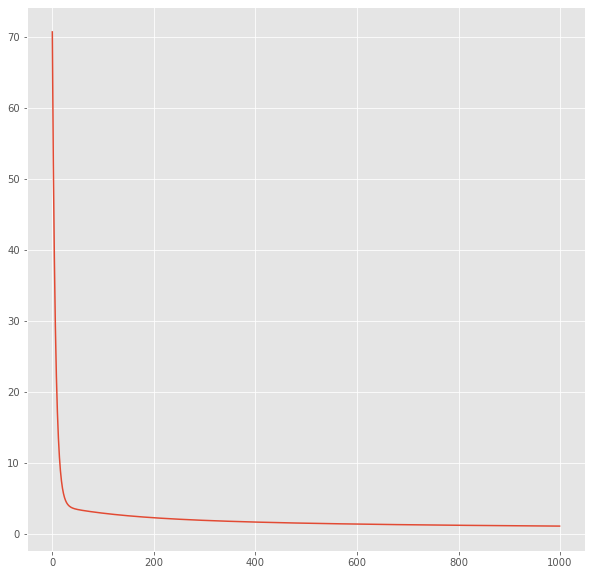

In [28]:
abc.fit(learning_rate=0.0001,iteration=1000)

In [29]:
y_pred = abc.predict()
error = (1/X.shape[0])*np.sum(np.abs((y_pred - Y)/Y))
#RMSE = np.sqrt((1/X_test.shape[0])*np.sum(np.square((y_pred - Y))))

In [41]:
print(f"Test error(MAPE) is :  {error*100:.2f} %")

Test error(MAPE) is :  17.02 %


___

### Regression using Neural Network

In [146]:
df= pd.read_csv("Concrete_Data_Yeh.csv")

In [165]:
df= df/10

In [167]:
X = df.drop("csMPa",axis = 1)
Y = df["csMPa"]

In [253]:
def get_data():
    #get train data
    train_data_path ='train.csv'
    train = pd.read_csv(train_data_path)
    
    #get test data
    test_data_path ='test.csv'
    test = pd.read_csv(test_data_path)
    
    return train , test

def get_combined_data():
    
  #reading train data
    train , test = get_data()

    target = train.SalePrice
    train.drop(['SalePrice'],axis = 1 , inplace = True)

    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Id'], inplace=True, axis=1)
    return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()

/var/folders/9w/y6dgsfld2f94jqzfxb_f6q800000gn/T/ipykernel_13551/3152729597.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = train.append(test)


In [254]:
combined.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [255]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [256]:
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [257]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))


Number of numerical columns with no nan values : 25
Number of nun-numerical columns with no nan values : 20


In [258]:
combined = combined[num_cols + cat_cols]

In [259]:
combined.shape

(2919, 45)

In [260]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))


There were 45 columns before encoding categorical features
There are 149 columns after encoding categorical features


In [261]:
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]

    return train , test 
  
train, test = split_combined()

In [262]:
train.shape

(1460, 149)

In [263]:
class Feed_Forword_Neural_Network:
    
    def __init__(self, n_inputs, hidden_sizes=[2]):
        self.nx = n_inputs
        self.ny = 1
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny]

        self.W = {}
        self.B = {}
        for i in range(self.nh+1):

            self.W[i+1] = np.ones((self.sizes[i], self.sizes[i+1]))
            self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    def forward_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh+1):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])
        return self.A[self.nh+1]

    def grad_sigmoid(self, x):
        return x*(1-x) 
    
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))

    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):

    # initialise w, b
        if initialise:
            for i in range(self.nh+1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.zeros((1, self.sizes[i+1]))

        if display_loss:
            loss = {}

        for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dW = {}
            dB = {}
            for i in range(self.nh+1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.grad(x, y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]

            m = X.shape[1]
            
            for i in range(self.nh+1):
                self.W[i+1] -= learning_rate * dW[i+1] / m
                self.B[i+1] -= learning_rate * dB[i+1] / m

            if display_loss:
                Y_pred = self.predict(X)
                error = (Y_pred-Y)**2
         
                loss[e] = 1 / (m) * np.sum(error)

        if display_loss:
            plt.plot(np.array(list(loss.values())).astype(float))
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.show()
      
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()

In [264]:
model = Feed_Forword_Neural_Network(149,[8,8,4,2])

/var/folders/9w/y6dgsfld2f94jqzfxb_f6q800000gn/T/ipykernel_13551/2008483748.py:56: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

/var/folders/9w/y6dgsfld2f94jqzfxb_f6q800000gn/T/ipykernel_13551/2008483748.py:17: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))


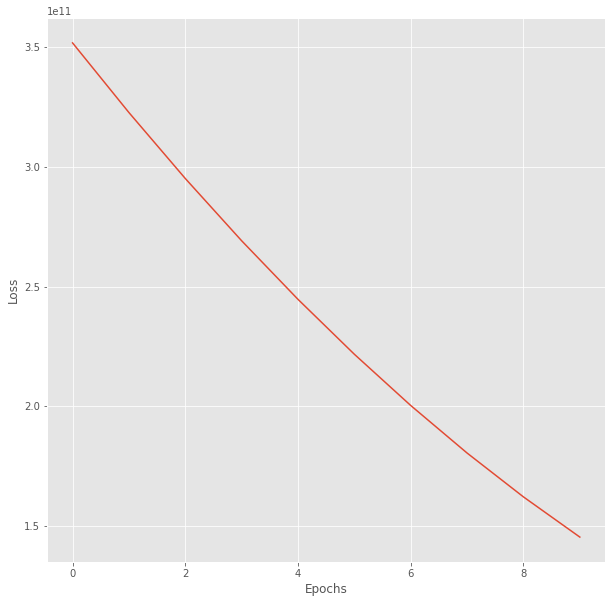

In [283]:
model.fit(train.values,target.values,epochs=10, learning_rate=0.005, initialise=True, display_loss=True)

In [275]:
y_pred = model.predict(test.values)


/var/folders/9w/y6dgsfld2f94jqzfxb_f6q800000gn/T/ipykernel_13551/2008483748.py:17: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))


In [276]:
print(f"Test error(RMSE) is : {error : .2f}")

Test error(RMSE) is :  0.71


In [281]:
error = (1/X.shape[0])*np.sum(np.abs((y_pred - Y)/Y))

In [282]:
error

1.4136791516234861

In [238]:
test.tail()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
2914,160,1936,4,7,1970,1970,546,546,0,1092,...,1,0,0,1,0,0,0,0,1,0
2915,160,1894,4,5,1970,1970,546,546,0,1092,...,1,0,0,1,1,0,0,0,0,0
2916,20,20000,5,7,1960,1996,1224,0,0,1224,...,1,0,0,1,1,0,0,0,0,0
2917,85,10441,5,5,1992,1992,970,0,0,970,...,1,0,0,1,0,0,0,0,1,0
2918,60,9627,7,5,1993,1994,996,1004,0,2000,...,1,0,0,1,0,0,0,0,1,0


In [284]:
def make_submission(prediction, sub_name):
    
    my_submission = pd.DataFrame({'Id':pd.read_csv('test.csv').Id,'SalePrice':prediction})
    my_submission.to_csv('{}.csv'.format(sub_name),index=False)
    print('A submission file has been made')

predictions = model.predict(test.values)



/var/folders/9w/y6dgsfld2f94jqzfxb_f6q800000gn/T/ipykernel_13551/2008483748.py:17: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))


In [286]:
predictions[-1]

88638.7892385087

In [279]:
test22= pd.read_csv("sample_submission.csv")

In [280]:
Y = test22["SalePrice"]